In [7]:
from model_evaluate import evaluate_model

In [8]:
# Step 1: Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 2: Load the saved training and testing data
train_data = pd.read_csv("train_multi_output.csv")
test_data = pd.read_csv("test_multi_output.csv")

# Step 3: Separate features (X) and target variables (y)
X_train = train_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_train = train_data[['PV_production', 'Wind_production']]

X_test = test_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_test = test_data[['PV_production', 'Wind_production']]

# Step 4: Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = lr_model.predict(X_test)



--- Linear Regression - PV Production ---
MAE: 784.187
MSE: 1338366.155
RMSE: 1156.878
R²: 0.903
Adjusted R²: 0.903
Explained Variance: 0.903
Sample Size: 11664
Visualization Sample: 5,000 points


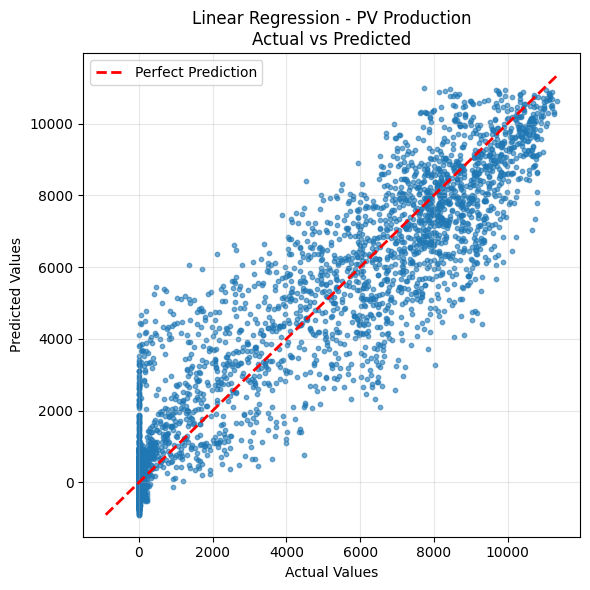

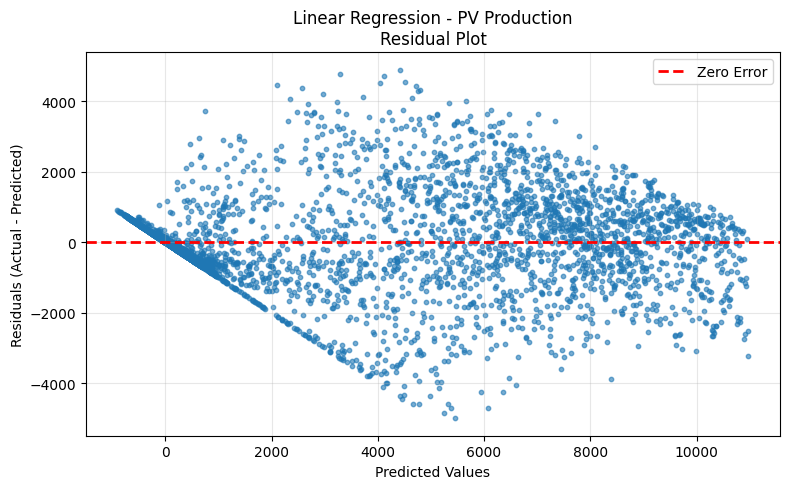

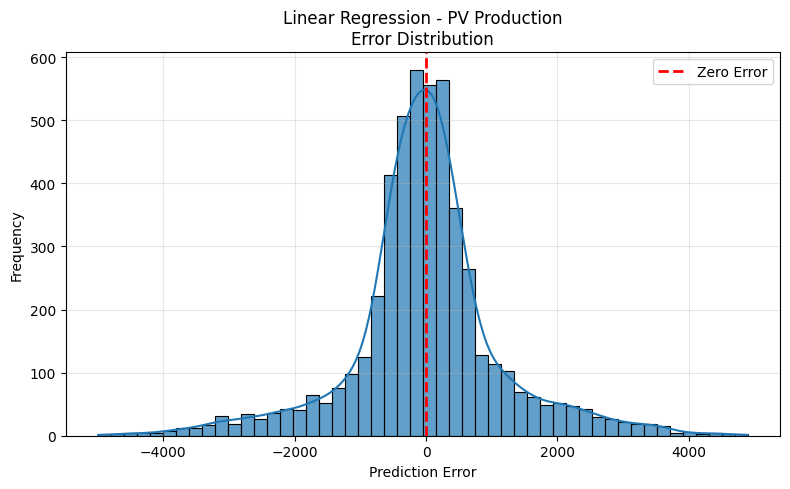

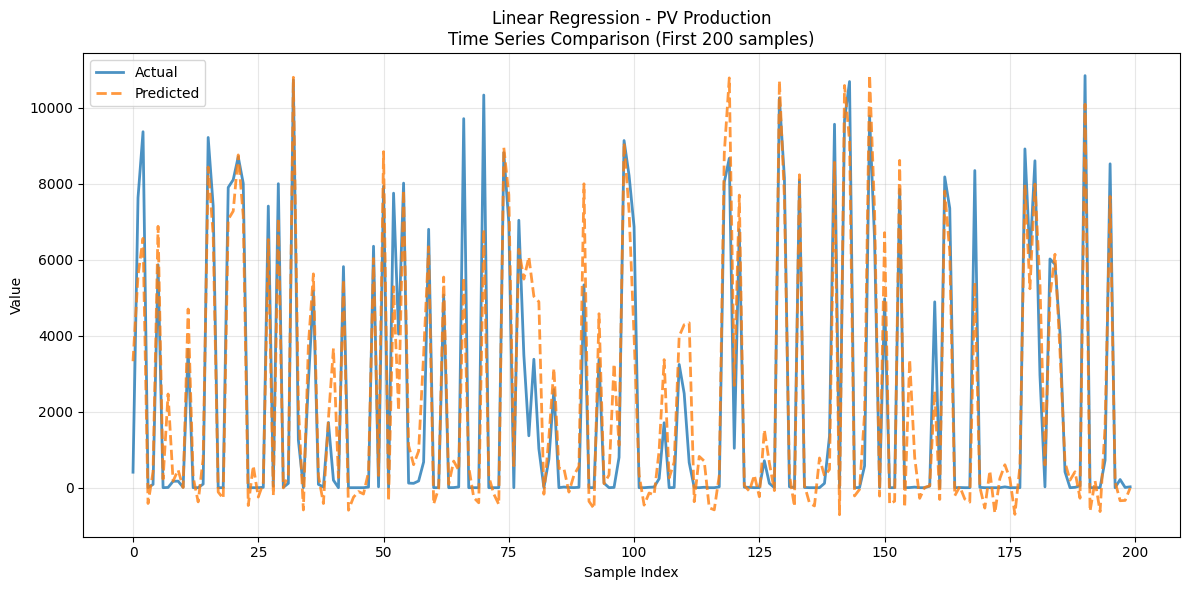

--- Linear Regression - Wind Production ---
MAE: 692.397
MSE: 733437.892
RMSE: 856.410
R²: 0.481
Adjusted R²: 0.481
Explained Variance: 0.481
Sample Size: 11664
Visualization Sample: 5,000 points


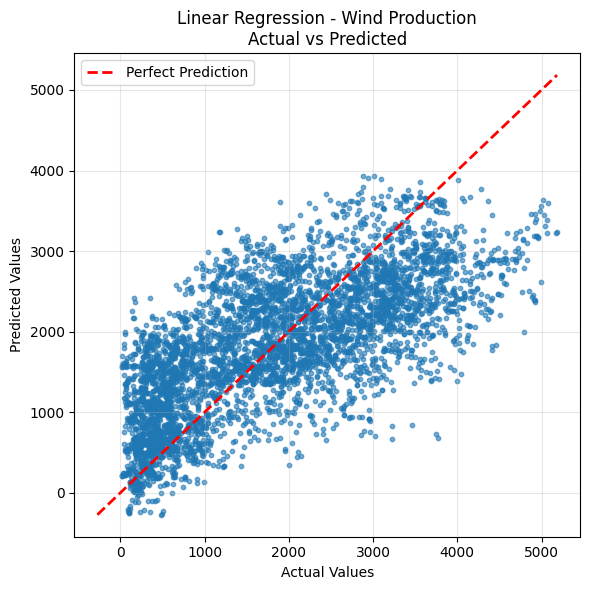

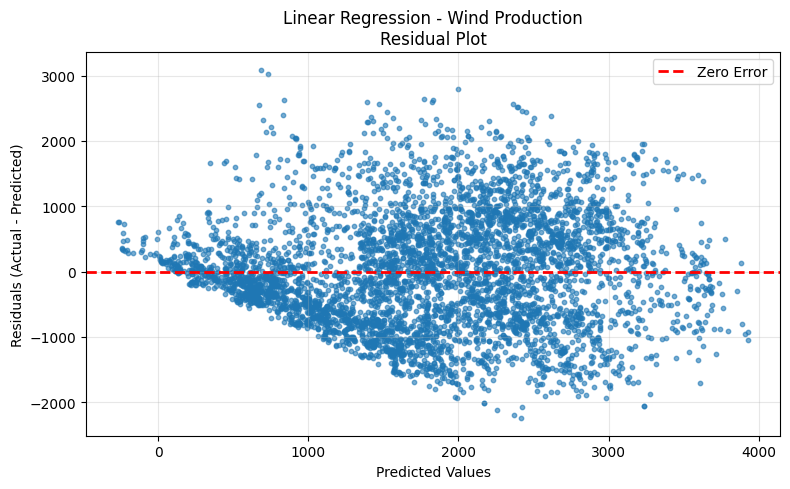

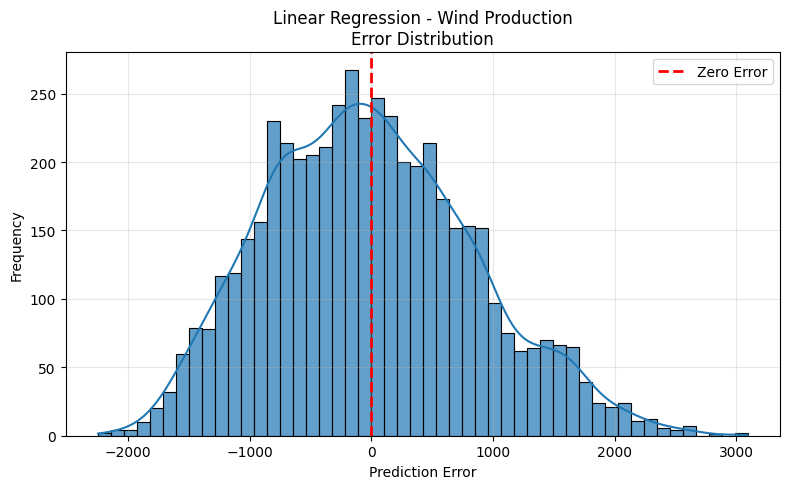

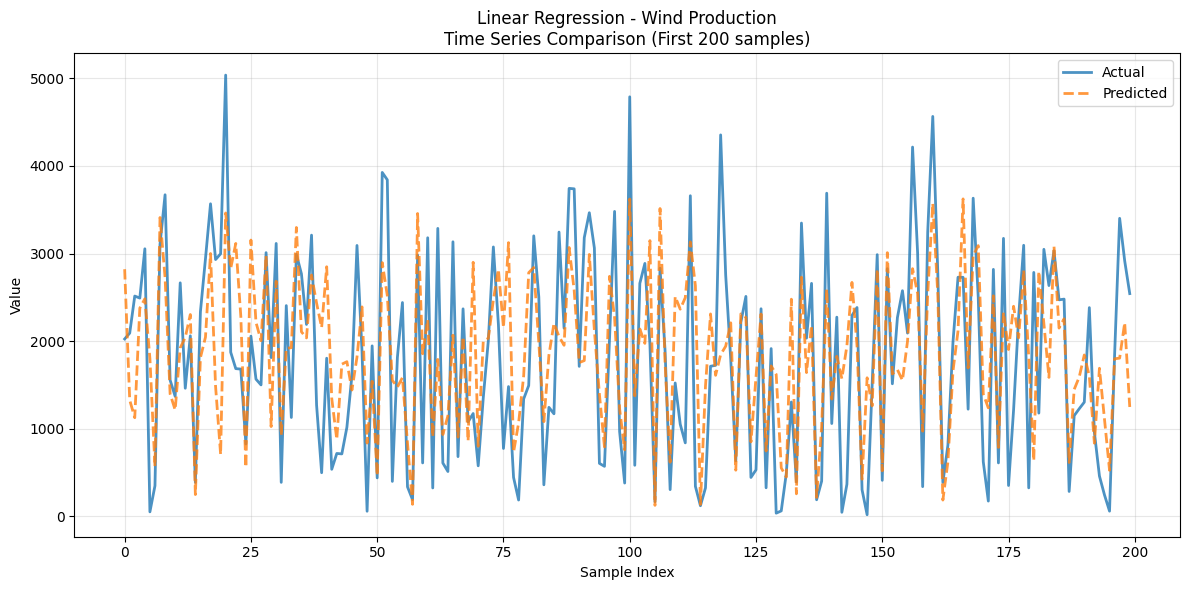

{'mae': np.float64(692.3974350505151),
 'mse': np.float64(733437.8917868772),
 'rmse': np.float64(856.409885386009),
 'r2': 0.4813478171615323,
 'adj_r2': 0.4813033434706697,
 'explained_variance': 0.48144517870265247}

In [9]:
evaluate_model(y_test['PV_production'], lr_model.predict(X_test)[:,0], "Linear Regression", "PV Production")
evaluate_model(y_test['Wind_production'], lr_model.predict(X_test)[:,1], "Linear Regression", "Wind Production")